In [151]:
import numpy as np  
import pandas as pd
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from sklearn.model_selection import train_test_split as tt_split
import seaborn as sns


# Input Data

In [108]:
rating_data=pd.read_csv("ratings_Electronics.csv")

In [109]:
rating_data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [110]:
data=rating_data.rename(columns={'AKM1MP6P0OYPR':'userid','0132793040':'productid','5.0':'rating'})

Renaming data to a more understandable format

In [148]:
data.head()

AttributeError: 'DatasetAutoFolds' object has no attribute 'head'

In [112]:
data=data.drop('1365811200',axis=1)

Dropping Timestamp column because we wont be using it

In [113]:
data.head()

,userid,productid,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [114]:
data['count'] = data.groupby('userid')['userid'].transform('count')

In [115]:
data['n_items'] = data.groupby('productid')['productid'].transform('count')

In [116]:
data.head()

,userid,productid,rating,count,n_items
0,A2CX7LUOHB2NDG,0321732944,5.0,4,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1,3
2,A2WNBOD3WNDNKT,0439886341,3.0,1,3
3,A1GI0U4ZRJA8WN,0439886341,1.0,1,3
4,A1QGNMC6O1VW39,0511189877,5.0,2,6


In [117]:
datac=data[data['count'] > 99]

In [118]:
datac.shape

(44209, 5)

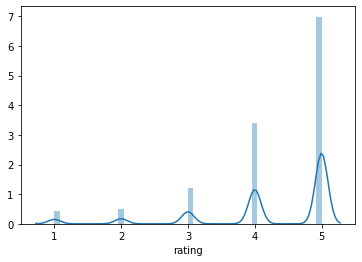

In [154]:
sns.distplot(datac['rating'])

Distribution of the ratings column

# Popularity Recommended System 

In [119]:
datac.groupby('productid')['rating'].count().sort_values(ascending=False).head()   

productid
B0088CJT4U    74
B002R5AM7C    60
B003ES5ZUU    55
B00829TIEK    52
B004CLYEDC    50
Name: rating, dtype: int64

In [120]:
datac.groupby('productid')['rating'].mean().sort_values(ascending=False).head()  

productid
B00LKG1MC8    5.0
B004MSMCSO    5.0
B004MS8QQ6    5.0
B004MS0DIK    5.0
B000NMFCIA    5.0
Name: rating, dtype: float64

Top 5 Products

# Collaborative Filtering Recommendation System

In [135]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(datac[['userid', 'productid', 'rating']], reader)
data



In [136]:
trainset,testset =train_test_split(data, test_size=0.3,random_state=1)

In [137]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based':True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [138]:
test_pred = algo.test(testset)

In [139]:
test_pred

[Prediction(uid='ARXU3FESTWMJJ', iid='B00020T5FO', r_ui=1.0, est=4.284592515995605, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ABDR6IJ93HFIO', iid='B00009WO51', r_ui=5.0, est=4.284592515995605, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3A4ZAIBQWKOZS', iid='B003XE3X8Q', r_ui=5.0, est=4.731570819618787, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid='A19W47CXJJP1MI', iid='B00ETBHOIM', r_ui=4.0, est=4.554744525547445, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2WB7LZ595CR50', iid='B004X8R7VA', r_ui=1.0, est=3.8849557522123894, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3NOBH42C7UI5M', iid='B00825BZUY', r_ui=3.0, est=4.541958041958042, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A12DQZKRKTNF5E', iid='B001O94GNS', r_ui=5.0, est=4.783333333333333, details={'actual_k': 1, 'was_impossible': False}),

In [140]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0438


1.0437919569010545

In [141]:
test_pred_df = pd.DataFrame(test_pred)
test_pred_df

,uid,iid,r_ui,est,details
0,ARXU3FESTWMJJ,B00020T5FO,1.0,4.284593,"{'was_impossible': True, 'reason': 'User and/o..."
1,ABDR6IJ93HFIO,B00009WO51,5.0,4.284593,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3A4ZAIBQWKOZS,B003XE3X8Q,5.0,4.731571,"{'actual_k': 7, 'was_impossible': False}"
3,A19W47CXJJP1MI,B00ETBHOIM,4.0,4.554745,"{'actual_k': 0, 'was_impossible': False}"
4,A2WB7LZ595CR50,B004X8R7VA,1.0,3.884956,"{'actual_k': 0, 'was_impossible': False}"
...,...,...,...,...,...
13258,ABIVKBMSIPEDY,B00JIJUC0M,5.0,3.970000,"{'actual_k': 0, 'was_impossible': False}"
13259,AOMEH9W6LHC4S,B00829TIEK,5.0,4.598224,"{'actual_k': 16, 'was_impossible': False}"
13260,A1FR68QH6Z4YZM,B00092PI0G,5.0,4.284593,"{'was_impossible': True, 'reason': 'User and/o..."
13261,A1EVV74UQYVKRY,B0019UGCLG,5.0,4.132325,"{'actual_k': 1, 'was_impossible': False}"


In [142]:
testset_new = trainset.build_anti_testset()
len(testset_new)

5059789

In [143]:
predictions = algo.test(testset_new)

In [144]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [145]:
predictions_df.head()

,0,1,2
0,A2W9I628I6SE1U,B00535CWN0,4.180556
1,A2W9I628I6SE1U,B000HSCLBG,4.180556
2,A2W9I628I6SE1U,B007BY0MIS,2.866514
3,A2W9I628I6SE1U,B005AL5UWC,4.180556
4,A2W9I628I6SE1U,B00HPM1G8Q,4.250000


In [146]:
predictions_df.columns = ["CustomerID","ItemID","Est_rating"]
predictions_df.sort_values(by = ["CustomerID","ItemID", "Est_rating"],ascending=False,inplace=True)

In [147]:
top_5_recommendations = predictions_df.groupby("CustomerID").head(5).reset_index(drop=True)
top_5_recommendations

,CustomerID,ItemID,Est_rating
0,AZMY6E8B52L2T,B00LGQ6HL8,4.809490
1,AZMY6E8B52L2T,B00LA6T0LS,3.933211
2,AZMY6E8B52L2T,B00L8I6SFY,4.945104
3,AZMY6E8B52L2T,B00L403O94,4.678832
4,AZMY6E8B52L2T,B00L3YHF6O,5.000000
...,...,...,...
1440,A100UD67AHFODS,B00LGQ6HL8,4.820787
1441,A100UD67AHFODS,B00LA6T0LS,4.475610
1442,A100UD67AHFODS,B00L8I6SFY,4.475610
1443,A100UD67AHFODS,B00L403O94,4.475610


Top 5 products Recommended for each user